Task: Naïve Bayes – Weather Forecast

Meteorologists want to classify whether it will rain tomorrow.

Features: humidity, temperature, wind_speed, pressure
Target: rain_tomorrow (0 = No, 1 = Yes)

 Train a Naïve Bayes model and evaluate accuracy. Predict outcome for:
 humidity=75, temperature=28, wind_speed=12, pressure=1010.

In [ ]:
import pandas as pd                  
import numpy as np                  
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB           
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score           

df = pd.read_csv('usa_rain_prediction_dataset_2024_2025.csv')
print(df.head(5))



         Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
0  2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
1  2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
2  2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
3  2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
4  2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   

   Cloud Cover     Pressure  Rain Tomorrow  
0    69.617966  1026.030278              0  
1    41.606048   995.962065              0  
2    77.364763   980.796739              1  
3    52.541196   979.012163              0  
4    85.584000  1031.790859              0  


In [23]:
display(df.isnull().sum())
df.nunique

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

<bound method DataFrame.nunique of              Date         Location  Temperature   Humidity  Wind Speed  \
0      2024-01-01         New York    87.524795  75.655455   28.379506   
1      2024-01-02         New York    83.259325  28.712617   12.436433   
2      2024-01-03         New York    80.943050  64.740043   14.184831   
3      2024-01-04         New York    78.097552  59.738984   19.444029   
4      2024-01-05         New York    37.059963  34.766784    3.689661   
...           ...              ...          ...        ...         ...   
73095  2025-12-27  Washington D.C.    40.614393  65.099438   28.778327   
73096  2025-12-28  Washington D.C.    52.641643  30.610525   12.282890   
73097  2025-12-29  Washington D.C.    56.492591  96.740232    2.894762   
73098  2025-12-30  Washington D.C.    65.748956  63.900004   24.632400   
73099  2025-12-31  Washington D.C.    54.648609  80.812021   22.722505   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  
0           

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


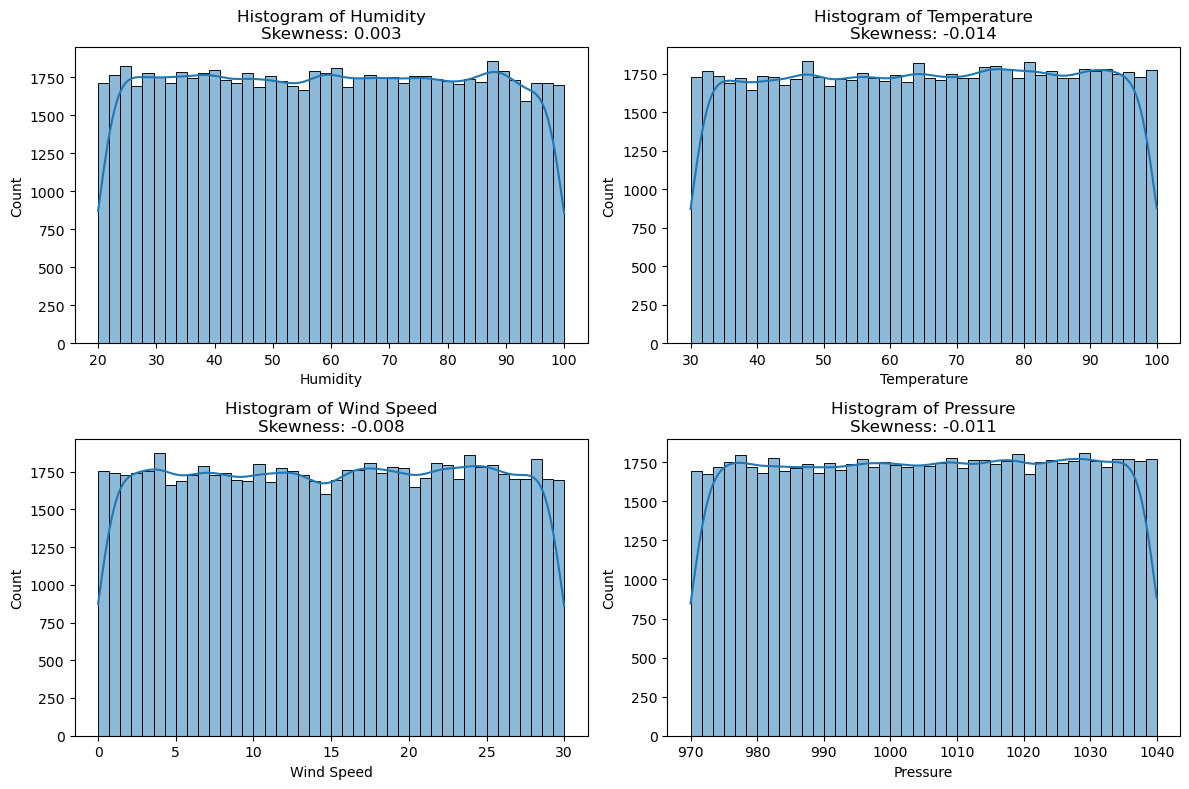

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Humidity', 'Temperature', 'Wind Speed', 'Pressure']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    skew_val = df[col].skew()
    plt.title(f'Histogram of {col}\nSkewness: {skew_val:.3f}')
plt.tight_layout()
plt.show()


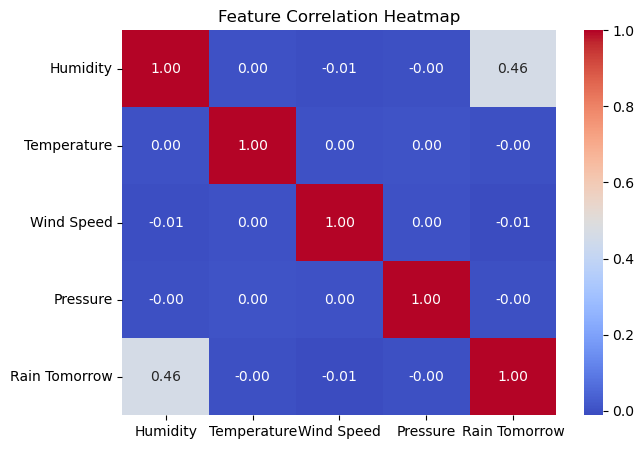

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Humidity', 'Temperature', 'Wind Speed', 'Pressure']
target = 'Rain Tomorrow'

# Correlation matrix for selected columns
corr_matrix = df[num_cols + [target]].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [27]:
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [28]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Humidity', 'Temperature', 'Wind Speed', 'Pressure']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [29]:
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,1.105756,0.684143,1.541362,0.000000,69.617966,1.032198,0
1,2024-01-02,New York,0.894653,-1.351014,-0.297798,0.526995,41.606048,-0.456051,0
2,2024-01-03,New York,0.780018,0.210917,-0.096107,0.916884,77.364763,-1.206671,1
3,2024-01-04,New York,0.639191,-0.005899,0.510584,0.094134,52.541196,-1.295000,0
4,2024-01-05,New York,-1.391804,-1.088542,-1.306808,1.361272,85.584000,1.317322,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,-1.215891,0.226498,1.587369,0.000000,54.168514,-1.390448,0
73096,2025-12-28,Washington D.C.,-0.620649,-1.268732,-0.315511,0.871000,22.068055,-1.216821,0
73097,2025-12-29,Washington D.C.,-0.430062,1.598251,-1.398506,1.191956,52.336048,0.558964,1
73098,2025-12-30,Washington D.C.,0.028046,0.174498,1.109104,0.483421,76.785280,1.347281,1


In [30]:

display(df)
print(df[num_cols])

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,1.105756,0.684143,1.541362,0.000000,69.617966,1.032198,0
1,2024-01-02,New York,0.894653,-1.351014,-0.297798,0.526995,41.606048,-0.456051,0
2,2024-01-03,New York,0.780018,0.210917,-0.096107,0.916884,77.364763,-1.206671,1
3,2024-01-04,New York,0.639191,-0.005899,0.510584,0.094134,52.541196,-1.295000,0
4,2024-01-05,New York,-1.391804,-1.088542,-1.306808,1.361272,85.584000,1.317322,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,-1.215891,0.226498,1.587369,0.000000,54.168514,-1.390448,0
73096,2025-12-28,Washington D.C.,-0.620649,-1.268732,-0.315511,0.871000,22.068055,-1.216821,0
73097,2025-12-29,Washington D.C.,-0.430062,1.598251,-1.398506,1.191956,52.336048,0.558964,1
73098,2025-12-30,Washington D.C.,0.028046,0.174498,1.109104,0.483421,76.785280,1.347281,1


       Humidity  Temperature  Wind Speed  Pressure
0      0.684143     1.105756    1.541362  1.032198
1     -1.351014     0.894653   -0.297798 -0.456051
2      0.210917     0.780018   -0.096107 -1.206671
3     -0.005899     0.639191    0.510584 -1.295000
4     -1.088542    -1.391804   -1.306808  1.317322
...         ...          ...         ...       ...
73095  0.226498    -1.215891    1.587369 -1.390448
73096 -1.268732    -0.620649   -0.315511 -1.216821
73097  1.598251    -0.430062   -1.398506  0.558964
73098  0.174498     0.028046    1.109104  1.347281
73099  0.907700    -0.521322    0.888782 -1.501725

[73100 rows x 4 columns]


In [ ]:
import pandas as pd

df_0 = df[df['Rain Tomorrow'] == 0].sample(n=15000, random_state=42)
df_1 = df[df['Rain Tomorrow'] == 1].sample(n=15000, random_state=42)

df_balanced = pd.concat([df_0, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

num_cols = ['Humidity', 'Temperature', 'Wind Speed', 'Pressure']
target = 'Rain Tomorrow'

X = df_balanced[num_cols]
y = df_balanced[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {pre:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 score: {f1:.3f}")


Accuracy: 0.756
Precision: 0.736
Recall: 0.790
F1 score: 0.762


In [33]:
df_balanced[df_balanced['Rain Tomorrow'] == 0].value_counts().sum()

np.int64(15000)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

num_cols = ['Humidity', 'Temperature', 'Wind Speed', 'Pressure']
target = 'Rain Tomorrow'

X = df_balanced[num_cols]
y = df_balanced[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB(var_smoothing=1e-9)
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Naive Bayes Accuracy: {acc:.3f}")
print(f"Naive Bayes Precision: {pre:.3f}")
print(f"Naive Bayes Recall: {rec:.3f}")
print(f"Naive Bayes F1 score: {f1:.3f}")


Naive Bayes Accuracy: 0.779
Naive Bayes Precision: 0.735
Naive Bayes Recall: 0.862
Naive Bayes F1 score: 0.793


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing' : [1e-9]
}

grid = GridSearchCV(
    GaussianNB(),
    param_grid = param_grid,
    cv=10,
    scoring={'accuracy':'accuracy', 'f1':'f1_macro'},
    refit = 'accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters: {'var_smoothing': 1e-09}


In [36]:
y_pred = grid.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Accuracy: {acc:.3f}")
print(f"Random Forest Precision: {pre:.3f}")

Random Forest Accuracy: 0.779
Random Forest Precision: 0.735


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200,250,300],
    'max_depth': [None, 5, 10, 15, 20,25,30],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring={'accuracy':'accuracy', 'f1':'f1_macro'},
    refit = 'accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)



Fitting 3 folds for each of 84 candidates, totalling 252 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}


In [38]:
y_pred = grid.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Accuracy: {acc:.3f}")
print(f"Random Forest Precision: {pre:.3f}")

Random Forest Accuracy: 0.823
Random Forest Precision: 0.735


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

num_cols = ['Humidity', 'Temperature', 'Wind Speed', 'Pressure']
target = 'Rain Tomorrow'

X = df_balanced[num_cols]
y = df_balanced[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt',max_depth=5)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Accuracy: {acc:.3f}")
print(f"Random Forest Precision: {pre:.3f}")

Random Forest Accuracy: 0.823
Random Forest Precision: 0.735


In [ ]:
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

nb_model = GaussianNB().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)

joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [41]:
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

nb_model = GaussianNB().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)

joblib.dump(nb_model, "naive_bayes_model.pkl")

['naive_bayes_model.pkl']

In [42]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']